<a href="https://colab.research.google.com/github/abduljabbar2017/project-Tensorflow/blob/main/RNN_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

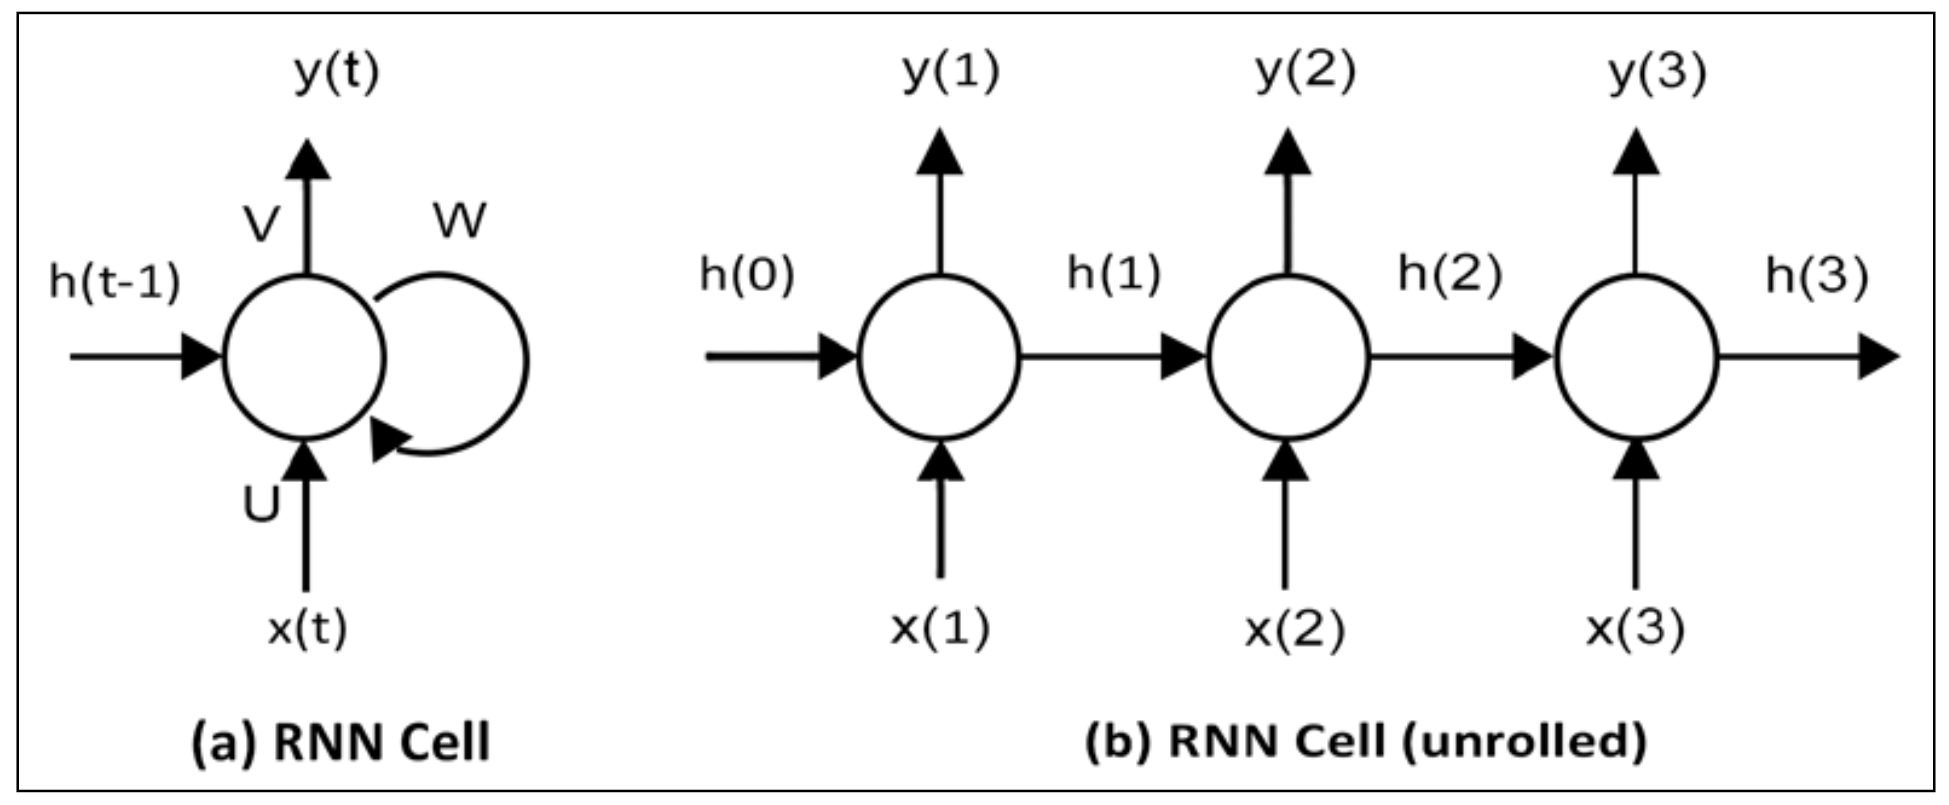

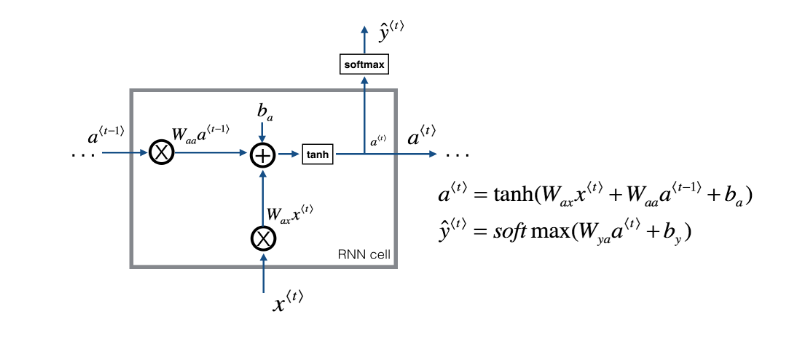<img src="images/RNN.png" style="width:500;height:300px;">
<caption><center> **Figure 1**: Basic RNN model </center></caption>

**Instructions**:
1. Compute the hidden state with tanh activation: $a^{\langle t \rangle} = \tanh(W_{aa} a^{\langle t-1 \rangle} + W_{ax} x^{\langle t \rangle} + b_a)$.
2. Using your new hidden state $a^{\langle t \rangle}$, compute the prediction $\hat{y}^{\langle t \rangle} = softmax(W_{ya} a^{\langle t \rangle} + b_y)$. We provided you a function: `softmax`.
3. Store $(a^{\langle t \rangle}, a^{\langle t-1 \rangle}, x^{\langle t \rangle}, parameters)$ in cache
4. Return $a^{\langle t \rangle}$ , $y^{\langle t \rangle}$ and cache

We will vectorize over $m$ examples. Thus, $x^{\langle t \rangle}$ will have dimension $(n_x,m)$, and $a^{\langle t \rangle}$ will have dimension $(n_a,m)$.

In [ ]:
import numpy as np

In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [ ]:
def rnn(xt, a_prev, param):
  """
  Implimenets of single forward step of the RNN-cell

  Arguments:
  xt-- the input at time step (t), numpy array of shape(n_x,m)
  a_prev-- Hidden state at timestep (t-1), numpay array of shape(n_a,m)
  param-- Python dictionary containing:
          waa -- weight matrix multiplying the input, numpy array of shape(n_a,n_a)
          wax -- weight matrix multiplying the hidden state, numpy array of shape (n_a,m)
          way -- weight matrix multipying the hidden state to output, numpy array of shape (n_y,n_a)

          ba -- Bias, numpy array of shape (n_a,1)
          by -- Bias relating the hidden state to the output, numpy array of shape (n_y,1)
  Return:
  a_next -- next hidden state, of shape (n_a,m)
  yt_pred -- prediction at timestep (t), numpy array of shape (n_y,m)
  cache -- tuple of values needed for the backward pass, conatins (n_next,a_prev,st,param)
  """

  # Retrieve parameters from "param" dictionary
  wax=param['wax']  #shape (n_a,m)
  waa=param['waa']  #shape (n_a,n_a)
  wya=param["wya"]  #shape (n_y,n_a)
  ba=param['ba']    #shape (n_ay,1)
  by=param['by']    #shape (n_y,1)

  # START CODE HERE #
  # compute next activaion state using the formula given above
  a_next=np.tanh(np.dot(waa,a_prev)+np.dot(wax,xt)+ba) # shape(n_a,n_a) #Fixed: np.dot(wax.xt) to np.dot(wax,xt)

  # compute output of the current cell using the formula given above
  yt_pred = softmax(np.dot(wya,a_next)+by)  # shape (n_y,n_a) #Fixed: np.dot(wya,n_next) to np.dot(wya,a_next)
  ##END CODE HERE##

  #store values you need for backward propagation in cache
  cache = (a_next, a_prev, xt, param) #Fixed: Indentation and  a_pred to a_prev
  return a_next, yt_pred, cache #Fixed: n_next to a_next

In [ ]:
np.random.seed(1)
xt = np.random.randn(3,10)
a_prev = np.random.randn(5,10)
waa = np.random.randn(5,5)
wax = np.random.randn(5,3)
wya = np.random.randn(2,5)

ba=np.random.randn (5,1)
by=np.random.randn (2,1)
param= {"waa": waa, "wax": wax, "wya": wya, "ba": ba, "by": by}

a_next,yt_pred,cache=rnn(xt,a_prev,param)
print("a_next[4]=",a_next[4])
print("a_next.shape = ", a_next.shape)
print("yt_pred[1]=",yt_pred[1])
print("yt_pred.shape = ", yt_pred.shape)


a_next[4]= [ 0.59584544  0.18141802  0.61311866  0.99808218  0.85016201  0.99980978
 -0.18887155  0.99815551  0.6531151   0.82872037]
a_next.shape =  (5, 10)
yt_pred[1]= [0.9888161  0.01682021 0.21140899 0.36817467 0.98988387 0.88945212
 0.36920224 0.9966312  0.9982559  0.17746526]
yt_pred.shape =  (2, 10)


In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def rnn_cell_forward(xt, a_prev, parameters):
    """
    Implements a single forward step of the RNN-cell.

    Arguments:
    xt -- input data at timestep "t", numpy array of shape (n_x, m)
    a_prev -- hidden state at timestep "t-1", numpy array of shape (n_a, m)
    parameters -- dictionary containing weights and biases

    Returns:
    a_next -- next hidden state, numpy array of shape (n_a, m)
    yt_pred -- prediction at timestep "t", numpy array of shape (n_y, m)
    cache -- tuple containing useful values for backward pass
    """

    Waa = parameters['Waa']  # Hidden state weight
    Wax = parameters['Wax']   # Input weight
    Wya = parameters['Wya']   # Output weight
    ba = parameters['ba']     # Hidden state bias
    by = parameters['by']     # Output bias

    # Calculate next hidden state
    a_next = np.tanh(np.dot(Waa, a_prev) + np.dot(Wax, xt) + ba)

    # Calculate output
    yt_pred = sigmoid(np.dot(Wya, a_next) + by)

    cache = (a_next, a_prev, xt)  # Store values for backward pass

    return a_next, yt_pred, cache

def rnn_forward(x, a0, parameters):
    """
    Implements the forward propagation of the RNN.

    Arguments:
    x -- input data for every time-step, shape (n_x, m, T_x)
    a0 -- initial hidden state, shape (n_a, m)
    parameters -- dictionary containing weights and biases

    Returns:
    a -- hidden states for all time steps
    y_pred -- predictions for all time steps
    caches -- tuple containing values for backward pass
    """

    n_a = parameters['Waa'].shape[0]  # Hidden state size
    m = x.shape[1]                    # Batch size
    T_x = x.shape[2]                  # Number of time steps

    # Initialize arrays to hold all hidden states and predictions
    a = np.zeros((n_a, m, T_x))
    y_pred = np.zeros((parameters['Wya'].shape[0], m, T_x))

    # Set initial hidden state
    a_next = a0

    for t in range(T_x):
        a_next, yt_pred, cache = rnn_cell_forward(x[:,:,t], a_next, parameters)
        a[:,:,t] = a_next  # Store hidden state
        y_pred[:,:,t] = yt_pred  # Store prediction

    return a, y_pred

# Example usage:
np.random.seed(1)

# Define dimensions
n_x = 3  # Number of features in input
n_a = 5  # Number of hidden units
n_y = 2  # Number of output classes
m = 10   # Batch size
T_x = 4  # Number of time steps

# Initialize random input data and parameters
x = np.random.randn(n_x, m, T_x)
a0 = np.random.randn(n_a, m)
parameters = {
    'Waa': np.random.randn(n_a, n_a),
    'Wax': np.random.randn(n_a, n_x),
    'Wya': np.random.randn(n_y, n_a),
    'ba': np.random.randn(n_a, 1),
    'by': np.random.randn(n_y, 1)
}

# Perform forward pass
a, y_pred = rnn_forward(x, a0, parameters)

print("Hidden states:\n", a)
print("Predictions:\n", y_pred)


Hidden states:
 [[[-0.94679727  0.99998902  0.99859532  0.99998339]
  [ 0.52566384  0.99993012 -0.99996484  0.99999942]
  [ 0.84483137  0.99971338  0.63006186  0.99999504]
  [ 0.95268814  0.9993585   0.87825787  0.9999979 ]
  [ 0.99996124  0.9999908   0.99897665  0.6007902 ]
  [ 0.94354992 -0.99516219  0.99987056  0.99902443]
  [-0.31399689  0.90494133  0.99964112  0.999997  ]
  [ 0.9985362  -0.95921363  0.97076661  0.99792727]
  [ 0.99995626  0.99994879  0.55718656  0.97797982]
  [ 0.99981346 -0.99139889 -0.90908533  0.99994617]]

 [[ 0.9017533  -0.0035545  -0.40146936  0.47240999]
  [-0.64008899 -0.99808521  0.90937915  0.99308063]
  [-0.61107796 -0.93987579 -0.82797531 -0.99944897]
  [ 0.69254271  0.70004749  0.95560602  0.03494921]
  [ 0.99323355  0.98511719  0.93041097  0.99371087]
  [-0.97376282  0.89291419  0.9777595   0.68670555]
  [ 0.96905989  0.84821902  0.99428756  0.91339115]
  [ 0.63387486 -0.0561147  -0.06557296 -0.0515541 ]
  [ 0.34250436  0.76229843  0.89552076 -0.6005